In [1]:
from google.colab import files
data = files.upload()

Saving burgers.mat to burgers (2).mat


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [40]:
pip install --upgrade tensorflow

     |████████████████████████████████| 462 kB 5.0 MB/s 


In [9]:
pip install --upgrade keras

In [35]:
tf.compat.v1.truncated_normal_initializer(
    mean=0.0, stddev=1.0, seed=None, dtype=tf.dtypes.float32
)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
pip install Keras==2.3.0

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
L-BFGS-B pretraining begins
Step: 10, log Loss: -3.120162e+00, loss_u: 4.413335e-02, loss_f: 1.664837e-05, loss_lambda: 2.087400e-09
Step: 20, log Loss: -3.359101e+00, loss_u: 3.244255e-02, loss_f: 2.323933e-03, loss_lambda: 5.156857e-09
Step: 30, lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:513: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:522: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Adam begins
It: 0, Log Loss: -5.176e+00, loss_u: 4.927616e-03, loss_f: 7.242788e-04, loss_lambda: 1.140094e-07, Time: 6.07
It: 10, Log Loss: -7.019e+00, loss_u: 8.047700e-04, loss_f: 8.966326e-05, loss_lambda: 1.140094e-07, Time: 0.65
It: 20, Log Loss: -6.871e+00, loss_u: 9.847012e-04, loss_f: 5.229916e-05, loss_lambda: 1.140094e-07, Time: 0.60
It: 30, Log Loss: -7.121e+00, loss_u: 7.507362e-04, loss_f: 5.678132e-05, loss_lambda: 1.140094e-07, Time: 0.60
It: 40, Log Loss: -7.283e+00, loss_u: 6.277857e-04, loss_f: 5.925028e-05, loss_lambda: 1.140094e-07, Time: 0.60
It: 50, Log Loss: -7.209e+00, loss_u: 6.885625e-04, loss_f: 5.096697e-05, loss_lambda: 1.140094e-07, Time: 0.60
It: 60, Log Loss: -7.152e+00, loss_u: 7.468223e-04, loss_f: 3.674477e-05, loss_lambda: 1.140094e-07, Time: 0.60
It: 70, Log Loss: -7.397e+00, loss_u: 5.739277e-04, loss_f: 3.923779e-05, loss_lambda: 1.140094e-07, Time: 0.61
It: 80, Log Loss: -7.461e+00, loss_u: 5.451099e-04, loss_f: 2.993475e-05, loss_lambda: 1.1400

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:779: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:789: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:834: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

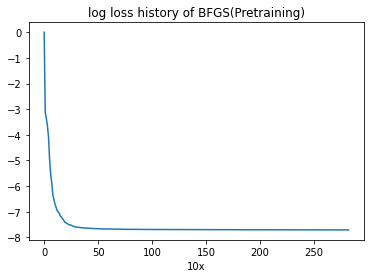

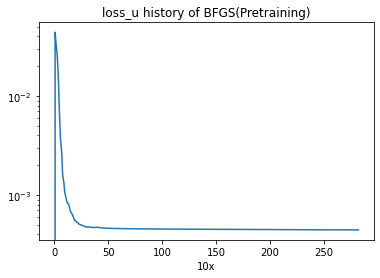

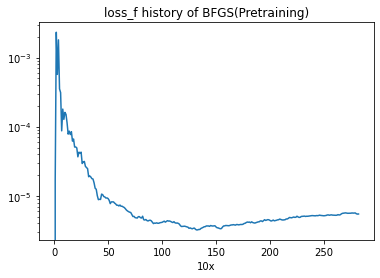

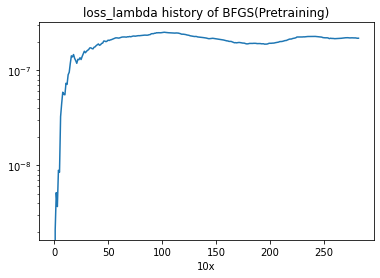

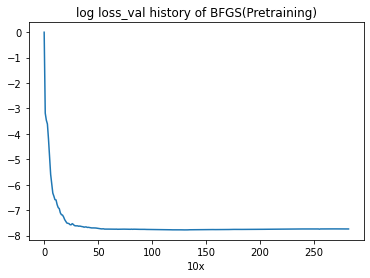

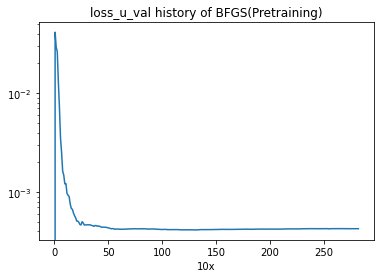

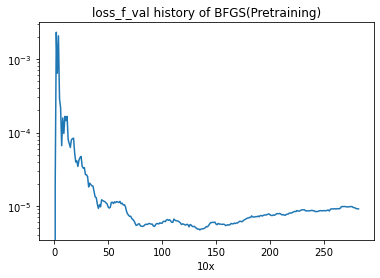

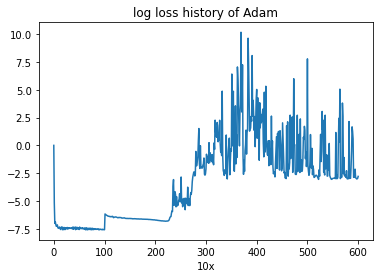

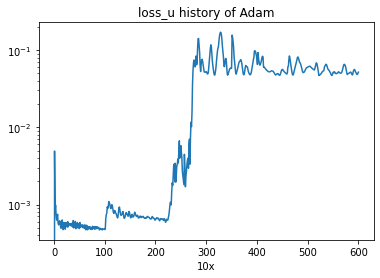

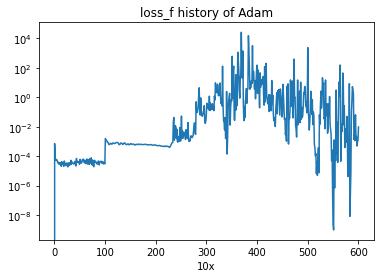

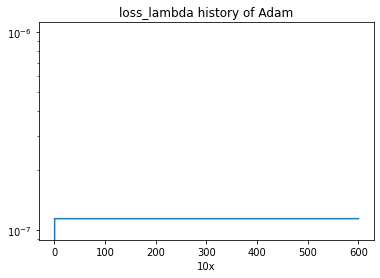

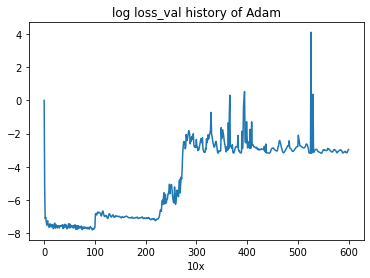

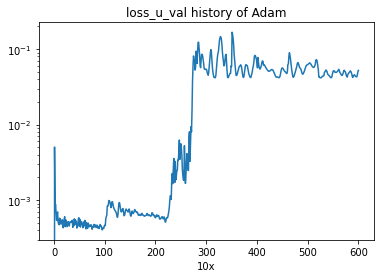

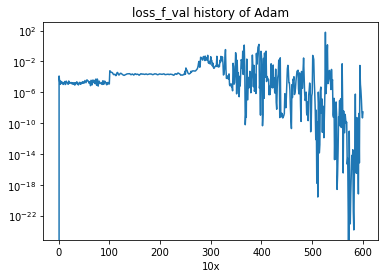

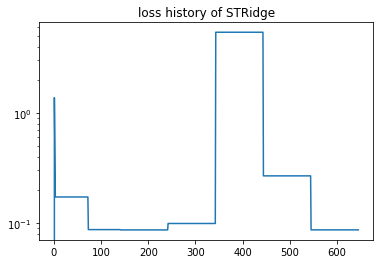

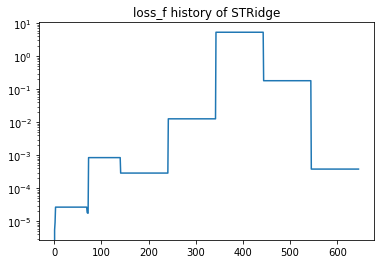

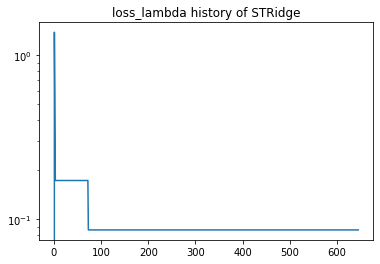

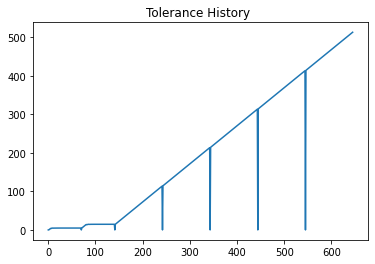

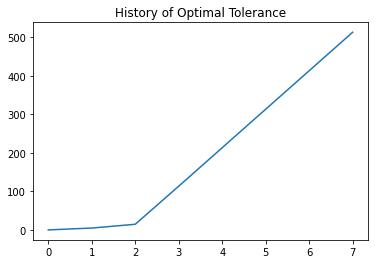

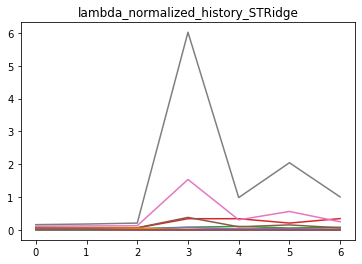

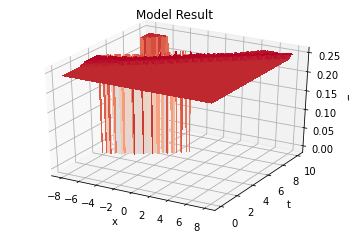

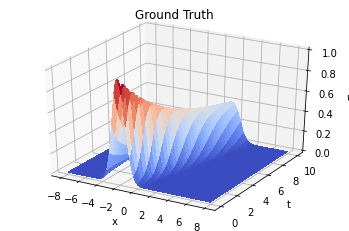

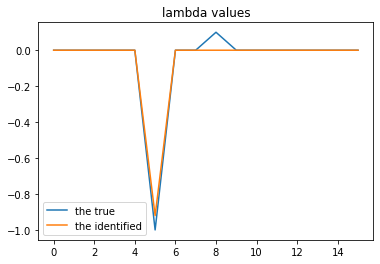

In [3]:
import tensorflow as tf
#import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
from scipy.spatial import distance
from matplotlib import cm
import time
from mpl_toolkits.mplot3d import Axes3D
from pyDOE import lhs
import os
with tf.device('/device:GPU:0'): 
    
# =============================================================================
#  define loss histories to record convergence
# =============================================================================
    
    # Adam loss history
    loss_history_Adam = np.array([0])
    loss_u_history_Adam = np.array([0])
    loss_f_history_Adam = np.array([0])
    loss_lambda_history_Adam = np.array([0])
    lambda_history_Adam = np.zeros((16,1))  
    loss_history_Adam_val = np.array([0])
    loss_u_history_Adam_val = np.array([0])
    loss_f_history_Adam_val = np.array([0])
    
    # STRidge loss history
    loss_history_STRidge = np.array([0])
    loss_f_history_STRidge = np.array([0])
    loss_lambda_history_STRidge = np.array([0])
    optimaltol_history = np.array([0])   
    tol_history_STRidge = np.array([0])
    lambda_normalized_history_STRidge = np.zeros((16,1))
    
    lambda_history_STRidge = np.zeros((16,1))
    ridge_append_counter_STRidge = np.array([0])
    
    # Loss histories for pretraining
    loss_history_Pretrain = np.array([0])
    loss_u_history_Pretrain = np.array([0])
    loss_f_history_Pretrain = np.array([0])
    loss_lambda_history_Pretrain = np.array([0])
    loss_history_val_Pretrain = np.array([0])
    loss_u_history_val_Pretrain = np.array([0])
    loss_f_history_val_Pretrain = np.array([0])
    step_Pretrain = 0
    
    lambda_history_Pretrain = np.zeros((16,1))  

    def reset_random_seeds():
        os.environ['PYTHONHASHSEED']=str(2)
        tf.random.set_seed(1234)
        np.random.seed(1234)
        random.seed(1234)
    
    class PhysicsInformedNN:
        # Initialize the class
        def __init__(self, X, u, X_f, X_val, u_val, layers, lb, ub):
            
            self.lb = lb
            self.ub = ub
            self.layers = layers
            
            # Initialize NNs
            self.weights, self.biases = self.initialize_NN(layers)
            
            #config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)

            #config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)
            config=tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
            config.gpu_options.allow_growth = True
            #self.sess = tf.Session(config = config)
            self.sess = tf.compat.v1.Session(config = config) 


            
            # Initialize parameters
            self.lambda1 = tf.Variable(tf.zeros([16, 1], dtype=tf.float32), dtype=tf.float32, name = 'lambda')
            
            # Specify the list of trainable variables 
            var_list_1 = self.biases + self.weights
            
            var_list_Pretrain = self.biases + self.weights
            var_list_Pretrain.append(self.lambda1)
            
            ######### Training data ################
            self.x = X[:,0:1]
            self.t = X[:,1:2]
            self.u = u
            self.x_f = X_f[:, 0:1]
            self.t_f = X_f[:, 1:2]



 
            self.x_tf = tf.placeholder(tf.float32, shape=[None, self.x.shape[1]])
            self.t_tf = tf.placeholder(tf.float32, shape=[None, self.t.shape[1]])
            self.u_tf = tf.placeholder(tf.float32, shape=[None, self.u.shape[1]])
            self.x_f_tf = tf.placeholder(tf.float32, shape=[None, self.x_f.shape[1]])
            self.t_f_tf = tf.placeholder(tf.float32, shape=[None, self.t_f.shape[1]])


            
            self.u_pred = self.net_u(self.x_tf, self.t_tf)
            self.f_pred, self.Phi_pred, self.u_t_pred = self.net_f(self.x_f_tf, self.t_f_tf, self.x_f.shape[0])
            
            self.loss_u = tf.reduce_mean(tf.square(self.u_tf - self.u_pred))
            self.loss_f_coeff_tf = tf.placeholder(tf.float32)
            self.loss_f = self.loss_f_coeff_tf*tf.reduce_mean(tf.square(self.f_pred))
            
            self.loss_lambda = 1e-7*tf.norm(self.lambda1, ord = 1)       
            
            
            self.loss = tf.log(self.loss_u  + self.loss_f + self.loss_lambda) # log loss
            
            ######### Validation data ################
            self.x_val = X_val[:,0:1]
            self.t_val = X_val[:,1:2]
            self.u_val = u_val
            
            self.x_val_tf = tf.placeholder(tf.float32, shape=[None, self.x_val.shape[1]])
            self.t_val_tf = tf.placeholder(tf.float32, shape=[None, self.t_val.shape[1]])
            self.u_val_tf = tf.placeholder(tf.float32, shape=[None, self.u_val.shape[1]])
                    
            self.u_val_pred = self.net_u(self.x_val_tf, self.t_val_tf)
            self.f_val_pred, _, _ = self.net_f(self.x_val_tf, self.t_val_tf, self.x_val.shape[0])
            
            self.loss_u_val = tf.reduce_mean(tf.square(self.u_val_tf - self.u_val_pred))
            self.loss_f_val = tf.reduce_mean(tf.square(self.f_val_pred))
            self.loss_val = tf.log(self.loss_u_val  + self.loss_f_val) # log loss
                        
            ######### Optimizor #########################
            self.optimizer = tf.contrib.opt.ScipyOptimizerInterface(self.loss, 
                                                                    var_list = var_list_1,
                                                                    method = 'L-BFGS-B', 
                                                                    options = {'maxiter': 1000,
                                                                               'maxfun': 1000,
                                                                               'maxcor': 50,
                                                                               'maxls': 50,
                                                                               'ftol' : 1.0 * np.finfo(float).eps})
    
            self.optimizer_Pretrain = tf.contrib.opt.ScipyOptimizerInterface(self.loss, 
                                                                    var_list = var_list_Pretrain,
                                                                    method = 'L-BFGS-B', 
                                                                   options = {'maxiter': 10000,
                                                                               'maxfun': 10000,
                                                                               'maxcor': 50,
                                                                               'maxls': 50,
                                                                               'ftol' : 1.0 * np.finfo(float).eps})
                                
            # The default settings: learning rate = 1e-3, beta1 = 0.9, beta2 = 0.999， epsilon = 1e-8
            self.global_step = tf.Variable(0, trainable=False)
            starter_learning_rate = 1e-3
            self.learning_rate = tf.train.exponential_decay(starter_learning_rate, self.global_step, 1000, 0.75,
                                                          staircase=True)
            self.optimizer_Adam = tf.train.AdamOptimizer(learning_rate=1e-3, beta1 = 0.99, beta2 = 0.9, epsilon = 1e-8) 
            self.train_op_Adam = self.optimizer_Adam.minimize(self.loss, var_list = var_list_1,
                                                              global_step = self.global_step)
            
            self.tf_dict = {self.x_tf: self.x, self.t_tf: self.t, self.u_tf: self.u, 
                       self.x_f_tf: self.x_f, self.t_f_tf: self.t_f,
                       self.x_val_tf: self.x_val, self.t_val_tf: self.t_val, self.u_val_tf: self.u_val}
            
            init = tf.global_variables_initializer()
            self.sess.run(init)
    
        def initialize_NN(self, layers):        
            weights = []
            biases = []
            num_layers = len(layers) 
            for l in range(0,num_layers-1):
                W = self.xavier_init(size=[layers[l], layers[l+1]])
                b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32, name = 'b')
                weights.append(W)
                biases.append(b)        
            return weights, biases
            
        def xavier_init(self, size):
            in_dim = size[0]
            out_dim = size[1]        
            xavier_stddev = np.sqrt(2/(in_dim + out_dim))
            #return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev), dtype=tf.float32, name = 'W')

            initial = tf.random.truncated_normal([in_dim, out_dim], stddev=xavier_stddev, dtype=tf.float32, seed=None, name=None)
            return tf.Variable(initial, dtype=tf.float32, name = 'W')
           # return tf.Variable(tf.truncated_normal([in_dim, out_dim], stddev=xavier_stddev, dtype=tf.float64),
                    #            dtype=tf.float64, name = 'W')
        
        def neural_net(self, X, weights, biases):
            num_layers = len(weights) + 1
            
            H = 2.0*(X - self.lb)/(self.ub - self.lb) - 1.0
            for l in range(0,num_layers-2):
                W = weights[l]
                b = biases[l]
                H = tf.tanh(tf.add(tf.matmul(H, W), b))
            W = weights[-1]
            b = biases[-1]
            Y = tf.add(tf.matmul(H, W), b)
            return Y
                
        def net_u(self, x, t):  
            u = self.neural_net(tf.concat([x,t],1), self.weights, self.biases)
            return u
        
        def net_f(self, x, t, N_f):
            u = self.net_u(x,t)
            u_t = tf.gradients(u, t)[0]
            u_x = tf.gradients(u, x)[0]
            u_xx = tf.gradients(u_x, x)[0]
            u_xxx = tf.gradients(u_xx, x)[0]    
            Phi = tf.concat([tf.constant(1, shape=[N_f, 1], dtype=tf.float32), u, u**2, u**3, u_x, u*u_x, u**2*u_x,
                                  u**3*u_x, u_xx, u*u_xx, u**2*u_xx, u**3*u_xx, u_xxx, u*u_xxx, u**2*u_xxx, u**3*u_xxx], 1)    
            self.library_description = ['1',
                         'u', 'u**2', 'u**3',
                         'u_x', 'u*u_x', 'u**2*u_x', 'u**3*u_x',
                         'u_xx', 'u*u_xx', 'u**2*u_xx', 'u**3*u_xx',
                         'u_xxx', 'u*u_xxx', 'u**2*u_xxx', 'u**3*u_xxx']
            
            f = tf.matmul(Phi, self.lambda1) - u_t      
            return f, Phi, u_t
        
                
        def callback_Pretrain(self, loss, loss_u, loss_f, loss_lambda, loss_val, loss_u_val, loss_f_val, lamu):
            global step_Pretrain
            step_Pretrain += 1
            if step_Pretrain % 10 == 0:
                print('Step: %d, log Loss: %e, loss_u: %e, loss_f: %e, loss_lambda: %e' % (step_Pretrain, loss, loss_u, loss_f,
                                                                                           loss_lambda))
                
                global loss_history_Pretrain
                global loss_u_history_Pretrain
                global loss_f_history_Pretrain
                global loss_lambda_history_Pretrain
                
                global loss_history_val_Pretrain
                global loss_u_history_val_Pretrain
                global loss_f_history_val_Pretrain
                
                global lambda_history_Pretrain
                
                loss_history_Pretrain = np.append(loss_history_Pretrain, loss)
                loss_u_history_Pretrain = np.append(loss_u_history_Pretrain, loss_u)
                loss_f_history_Pretrain = np.append(loss_f_history_Pretrain, loss_f)
                loss_lambda_history_Pretrain = np.append(loss_lambda_history_Pretrain, loss_lambda)
                
                loss_history_val_Pretrain = np.append(loss_history_val_Pretrain, loss_val)
                loss_u_history_val_Pretrain = np.append(loss_u_history_val_Pretrain, loss_u_val)
                loss_f_history_val_Pretrain = np.append(loss_f_history_val_Pretrain, loss_f_val)
                
                lambda_history_Pretrain = np.append(lambda_history_Pretrain, lamu, axis = 1)
            
        def train(self, nIter): # nIter is the number of ADO loop
            self.tf_dict = {self.x_tf: self.x, self.t_tf: self.t, self.u_tf: self.u, 
                       self.x_f_tf: self.x_f, self.t_f_tf: self.t_f,
                       self.x_val_tf: self.x_val, self.t_val_tf: self.t_val, self.u_val_tf: self.u_val,
                       self.loss_f_coeff_tf: 1}    
            
            # Pretraining,as a form of a good intialization
            print('L-BFGS-B pretraining begins')
            self.optimizer_Pretrain.minimize(self.sess,
                                    feed_dict = self.tf_dict,
                                    fetches = [self.loss, self.loss_u, self.loss_f, self.loss_lambda,
                                               self.loss_val, self.loss_u_val, self.loss_f_val, self.lambda1],
                                    loss_callback = self.callback_Pretrain)
            
            self.tf_dict[self.loss_f_coeff_tf] = 2
            for self.it in range(nIter):
                
                # Loop of STRidge optimization
                print('STRidge begins')
                self.callTrainSTRidge()
    
                # Loop of Adam optimization
                print('Adam begins')
                start_time = time.time()
                for it_Adam in range(1000):
                    
                    self.sess.run(self.train_op_Adam, self.tf_dict)
                    
                    # Print
                    if it_Adam % 10 == 0:
                        elapsed = time.time() - start_time
                        loss, loss_u, loss_f, loss_lambda, lambda1_value, loss_val, loss_u_val, loss_f_val = self.sess.run([self.loss, self.loss_u, self.loss_f, self.loss_lambda, self.lambda1, self.loss_val, self.loss_u_val, self.loss_f_val], self.tf_dict)
                        print('It: %d, Log Loss: %.3e, loss_u: %e, loss_f: %e, loss_lambda: %e, Time: %.2f' 
                              % (it_Adam, loss, loss_u, loss_f, loss_lambda, elapsed))
                        
                        lamu = self.sess.run(self.lambda1)
                        
                        global loss_history_Adam
                        global lambda_history_Adam
                        global loss_u_history_Adam
                        global loss_f_history_Adam
                        global loss_lambda_history_Adam
                        
                        global loss_history_Adam_val
                        global loss_u_history_Adam_val
                        global loss_f_history_Adam_val
                        
                        loss_history_Adam = np.append(loss_history_Adam, loss)
                        lambda_history_Adam = np.append(lambda_history_Adam, lambda1_value, axis=1)
                        loss_u_history_Adam = np.append(loss_u_history_Adam, loss_u)
                        loss_f_history_Adam = np.append(loss_f_history_Adam, loss_f)
                        loss_lambda_history_Adam = np.append(loss_lambda_history_Adam, loss_lambda)
                        
                        loss_history_Adam_val = np.append(loss_history_Adam_val, loss_val)
                        loss_u_history_Adam_val = np.append(loss_u_history_Adam_val, loss_u_val)
                        loss_f_history_Adam_val = np.append(loss_f_history_Adam_val, loss_f_val)
                        
                        lambda_history_Adam = np.append(lambda_history_Adam, lamu, axis = 1)
                
                        start_time = time.time()
                
                # Loop of L-BFGS-B optimization
                # print('L-BFGS-B begins')
                # self.optimizer.minimize(self.sess,
                #                         feed_dict = self.tf_dict,
                #                         fetches = [self.loss, self.loss_u, self.loss_f, self.loss_lambda,
                #                                    self.loss_val, self.loss_u_val, self.loss_f_val],
                #                         loss_callback = self.callback)
                
            # one more time of STRidge optimization
            print('STRidge begins')
            self.callTrainSTRidge()
    
    
        def predict(self, X_star):
            
            tf_dict = {self.x_tf: X_star[:,0:1], self.t_tf: X_star[:,1:2]}
            
            u_star = self.sess.run(self.u_pred, tf_dict)
            
            return u_star
        
        def callTrainSTRidge(self):
            lam = 1e-5
            d_tol = 1
            maxit = 100
            STR_iters = 10
            
            l0_penalty = None
            
            normalize = 2
            split = 0.8
            print_best_tol = False     
            Phi_pred, u_t_pred = self.sess.run([self.Phi_pred, self.u_t_pred], self.tf_dict)
            
            lambda2 = self.TrainSTRidge(Phi_pred, u_t_pred, lam, d_tol, maxit, STR_iters, l0_penalty, normalize, split,
                                             print_best_tol)     
            
            self.lambda1 = tf.assign(self.lambda1, tf.convert_to_tensor(lambda2, dtype = tf.float32))
                    
        def TrainSTRidge(self, R0, Ut, lam, d_tol, maxit, STR_iters = 10, l0_penalty = None, normalize = 2, split = 0.8, 
                         print_best_tol = False):            
# =============================================================================
#        Inspired by Rudy, Samuel H., et al. "Data-driven discovery of partial differential equations."
#        Science Advances 3.4 (2017): e1602614.
# =============================================================================           
            # First normalize data 
            n,d = R0.shape
            R = np.zeros((n,d), dtype=np.float32)
            if normalize != 0:
                Mreg = np.zeros((d,1))
                for i in range(0,d):
                    Mreg[i] = 1.0/(np.linalg.norm(R0[:,i],normalize))
                    R[:,i] = Mreg[i]*R0[:,i]                
                normalize_inner = 0
            else: 
                R = R0
                Mreg = np.ones((d,1))*d
                normalize_inner = 2
            
           
            global lambda_normalized_history_STRidge
            lambda_normalized_history_STRidge = np.append(lambda_normalized_history_STRidge, Mreg, axis = 1)
            
            # Split data into 80% training and 20% test, then search for the best tolderance.
            np.random.seed(0) # for consistancy
            n,_ = R.shape
            train = np.random.choice(n, int(n*split), replace = False)
            test = [i for i in np.arange(n) if i not in train]
            TrainR = R[train,:]
            TestR = R[test,:]
            TrainY = Ut[train,:]
            TestY = Ut[test,:]
        
            # Set up the initial tolerance and l0 penalty
            d_tol = float(d_tol)
            if self.it == 0: 
                self.tol = d_tol
                    
            # Or inherit Lambda
            w_best = self.sess.run(self.lambda1)/Mreg
            
            # err_f = np.linalg.norm(TestY - TestR.dot(w_best), 2)
            err_f = np.mean((TestY - TestR.dot(w_best))**2)
            
            if l0_penalty == None and self.it == 0: 
                self.l0_penalty_0 = 5**6*err_f
                l0_penalty = self.l0_penalty_0
            elif l0_penalty == None:
                l0_penalty = self.l0_penalty_0            
                
            err_lambda = l0_penalty*np.count_nonzero(w_best)
            err_best = err_f + err_lambda
            tol_best = 0
                        
            global loss_history_STRidge
            global loss_f_history_STRidge
            global loss_lambda_history_STRidge
            global tol_history_STRidge
            
            loss_history_STRidge = np.append(loss_history_STRidge, err_best)
            loss_f_history_STRidge = np.append(loss_f_history_STRidge, err_f)
            loss_lambda_history_STRidge = np.append(loss_lambda_history_STRidge, err_lambda)
            tol_history_STRidge = np.append(tol_history_STRidge, tol_best)
        
            # Now increase tolerance until test performance decreases
            for iter in range(maxit):
        
                # Get a set of coefficients and error
                w = self.STRidge(TrainR, TrainY, lam, STR_iters, self.tol, Mreg, normalize = normalize_inner)
                
                # err_f = np.linalg.norm(TestY - TestR.dot(w), 2)
                err_f = np.mean((TestY - TestR.dot(w))**2)
                
                err_lambda = l0_penalty*np.count_nonzero(w)
                err = err_f + err_lambda
        
                # Has the accuracy improved?
                if err <= err_best:
                    err_best = err
                    w_best = w
                    tol_best = self.tol
                    self.tol = self.tol + d_tol
                    
                    loss_history_STRidge = np.append(loss_history_STRidge, err_best)
                    loss_f_history_STRidge = np.append(loss_f_history_STRidge, err_f)
                    loss_lambda_history_STRidge = np.append(loss_lambda_history_STRidge, err_lambda)
                    tol_history_STRidge = np.append(tol_history_STRidge, tol_best)
        
                else:
                    self.tol = max([0,self.tol - 2*d_tol])
                    d_tol = d_tol/1.618
                    self.tol = self.tol + d_tol
        
            if print_best_tol: print ("Optimal tolerance:", tol_best)
            
            global optimaltol_history
            optimaltol_history = np.append(optimaltol_history, tol_best)
                    
            return np.real(np.multiply(Mreg, w_best))     
        
        def STRidge(self, X0, y, lam, maxit, tol, Mreg, normalize = 2, print_results = False):
        
            n,d = X0.shape
            X = np.zeros((n,d), dtype=np.complex64)
            # First normalize data
            if normalize != 0:
                Mreg = np.zeros((d,1))
                for i in range(0,d):
                    Mreg[i] = 1.0/(np.linalg.norm(X0[:,i],normalize))
                    X[:,i] = Mreg[i]*X0[:,i]                
            else: 
                X = X0
            
            # Inherit lambda
            w = self.sess.run(self.lambda1)/Mreg            
            
            biginds = np.where(abs(w) > tol)[0]
            num_relevant = d            
            
            global ridge_append_counter_STRidge
            ridge_append_counter = 0
            
            global lambda_history_STRidge
            lambda_history_STRidge = np.append(lambda_history_STRidge, np.multiply(Mreg, w), axis = 1)
            ridge_append_counter += 1
            
            # Threshold and continue
            for j in range(maxit):
        
                # Figure out which items to cut out
                smallinds = np.where(abs(w) < tol)[0]
                new_biginds = [i for i in range(d) if i not in smallinds]
                    
                # If nothing changes then stop
                if num_relevant == len(new_biginds): break
                else: num_relevant = len(new_biginds)
                    
                if len(new_biginds) == 0:
                    if j == 0: 
                        if normalize != 0:
                            lambda_history_STRidge = np.append(lambda_history_STRidge, w*Mreg, axis = 1)
                            ridge_append_counter += 1
                            ridge_append_counter_STRidge = np.append(ridge_append_counter_STRidge, ridge_append_counter)
                            return np.multiply(Mreg, w)
                        else:
                            lambda_history_STRidge = np.append(lambda_history_STRidge, w*Mreg, axis = 1)
                            ridge_append_counter += 1
                            ridge_append_counter_STRidge = np.append(ridge_append_counter_STRidge, ridge_append_counter)
                            return w
                    else: break
                biginds = new_biginds
                
                # Otherwise get a new guess
                w[smallinds] = 0
                
                if lam != 0: 
                    w[biginds] = np.linalg.lstsq(X[:, biginds].T.dot(X[:, biginds]) + lam*np.eye(len(biginds)),X[:, biginds].T.dot(y))[0]
                    lambda_history_STRidge = np.append(lambda_history_STRidge, np.multiply(Mreg,w), axis = 1)
                    ridge_append_counter += 1
                else: 
                    w[biginds] = np.linalg.lstsq(X[:, biginds],y)[0]
                    lambda_history_STRidge = np.append(lambda_history_STRidge, np.multiply(Mreg,w), axis = 1)
                    ridge_append_counter += 1
        
            # Now that we have the sparsity pattern, use standard least squares to get w
            if biginds != []: w[biginds] = np.linalg.lstsq(X[:, biginds],y)[0]
            
            if normalize != 0:
                lambda_history_STRidge = np.append(lambda_history_STRidge, w*Mreg, axis = 1)
                ridge_append_counter += 1
                ridge_append_counter_STRidge = np.append(ridge_append_counter_STRidge, ridge_append_counter)
                return np.multiply(Mreg, w)
            else:
                lambda_history_STRidge = np.append(lambda_history_STRidge, w*Mreg, axis = 1)
                ridge_append_counter += 1
                ridge_append_counter_STRidge = np.append(ridge_append_counter_STRidge, ridge_append_counter)
                return w
            
        
    if __name__ == "__main__":                 
        
        start_time = time.time()
        
        layers = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]
        
# =============================================================================
#         load data
# =============================================================================
        #data = scipy.io.loadmat(os.path.dirname(os.getcwd()) + '/Users/munzir/Desktop/data_f.mat')
        #data = os.getcwd()
        # data = scipy.io.loadmat(os.path.dirname(os.path.dirname(os.getcwd())) + '\\burgers.mat')
        data = scipy.io.loadmat('burgers.mat')
        
        t = np.real(data['t'].flatten()[:,None])
        x = np.real(data['x'].flatten()[:,None])
        Exact = np.real(data['usol']).T
        
        X, T = np.meshgrid(x,t)
        
        X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))
        u_star = Exact.flatten()[:,None]              
    
        # Doman bounds
        lb = X_star.min(0)
        ub = X_star.max(0)    
            
        # Measurement data
        # In this case, measurements are from N_u_s points and continuously sampled all the time.
        N_u_s = 10 
        idx_s = np.random.choice(x.shape[0], N_u_s, replace=False)
        X0 = X[:, idx_s]
        T0 = T[:, idx_s]
        Exact0 = Exact[:, idx_s]
        
        N_u_t = int(t.shape[0]*1)
        idx_t = np.random.choice(t.shape[0], N_u_t, replace=False)
        X0 = X0[idx_t, :]
        T0 = T0[idx_t, :]
        Exact0 = Exact0[idx_t, :]
        
        X_u_meas = np.hstack((X0.flatten()[:,None], T0.flatten()[:,None]))
        u_meas = Exact0.flatten()[:,None]   
        
        # Training measurements, which are randomly sampled spatio-temporally
        Split_TrainVal = 0.8
        N_u_train = int(X_u_meas.shape[0]*Split_TrainVal)
        idx_train = np.random.choice(X_u_meas.shape[0], N_u_train, replace=False)
        X_u_train = X_u_meas[idx_train,:]
        u_train = u_meas[idx_train,:]
        
        # Validation Measurements, which are the rest of measurements
        idx_val = np.setdiff1d(np.arange(X_u_meas.shape[0]), idx_train, assume_unique=True)
        X_u_val = X_u_meas[idx_val,:]
        u_val = u_meas[idx_val,:]
                
        # Collocation points
        N_f = 50000
    
        X_f_train = lb + (ub-lb)*lhs(2, N_f)
    #    X_f_train = lb + (ub-lb)*sobol_seq.i4_sobol_generate(2, N_f)        
        X_f_train = np.vstack((X_f_train, X_u_train))
        
        # Option: Add noise
        noise = 0.1
        u_train = u_train + noise*np.std(u_train)*np.random.randn(u_train.shape[0], u_train.shape[1])
        u_val = u_val + noise*np.std(u_val)*np.random.randn(u_val.shape[0], u_val.shape[1])
        
# =============================================================================
#         model
# =============================================================================
        model = PhysicsInformedNN(X_u_train, u_train, X_f_train, X_u_val, u_val, layers, lb, ub)
        model.train(6)
        
# =============================================================================
#         results & diagnostics
# =============================================================================
        # determine whether the training is sufficient
        
        f = open("stdout.txt", "a+")
                
        u_train_Pred = model.predict(X_u_train)                
        Error_u_Train = np.linalg.norm(u_train-u_train_Pred,2)/np.linalg.norm(u_train,2)   
        f.write('Training Error u: %e \n' % (Error_u_Train))     
        
        u_val_Pred = model.predict(X_u_val)                
        Error_u_Val = np.linalg.norm(u_val-u_val_Pred,2)/np.linalg.norm(u_val,2)   
        f.write('Validation Error u: %e \n' % (Error_u_Val))        
                    
             
        elapsed = time.time() - start_time                
        f.write('Training time: %.4f \n' % (elapsed))       
        
        ######################## Plots for BFGS(Pretraining) #################
        fig = plt.figure()
        plt.plot(loss_history_Pretrain)
        plt.xlabel('10x')
        plt.title('log loss history of BFGS(Pretraining)')
        plt.savefig('1.png')
        
        fig = plt.figure()
        plt.plot(loss_u_history_Pretrain)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_u history of BFGS(Pretraining)')  
        plt.savefig('2.png')
        
        fig = plt.figure()
        plt.plot(loss_f_history_Pretrain)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_f history of BFGS(Pretraining)')     
        plt.savefig('3.png')
        
        fig = plt.figure()
        plt.plot(loss_lambda_history_Pretrain)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_lambda history of BFGS(Pretraining)')  
        plt.savefig('4.png')
        
        fig = plt.figure()
        plt.plot(loss_history_val_Pretrain)
        plt.xlabel('10x')
        plt.title('log loss_val history of BFGS(Pretraining)')
        plt.savefig('5.png')
        
        fig = plt.figure()
        plt.plot(loss_u_history_val_Pretrain)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_u_val history of BFGS(Pretraining)')  
        plt.savefig('6.png')
        
        fig = plt.figure()
        plt.plot(loss_f_history_val_Pretrain)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_f_val history of BFGS(Pretraining)')
        plt.savefig('7.png')
        
        ######################## Plots for Adam #################
        fig = plt.figure()
        plt.plot(loss_history_Adam)
        plt.xlabel('10x')
        plt.title('log loss history of Adam')
        plt.savefig('8.png')
        
        fig = plt.figure()
        plt.plot(loss_u_history_Adam)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_u history of Adam')  
        plt.savefig('9.png')
        
        fig = plt.figure()
        plt.plot(loss_f_history_Adam)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_f history of Adam')  
        plt.savefig('10.png')
                
        fig = plt.figure()
        plt.plot(loss_lambda_history_Adam)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_lambda history of Adam')  
        plt.savefig('11.png')
        
        fig = plt.figure()
        plt.plot(loss_history_Adam_val)
        plt.xlabel('10x')
        plt.title('log loss_val history of Adam')
        plt.savefig('12.png')
        
        fig = plt.figure()
        plt.plot(loss_u_history_Adam_val)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_u_val history of Adam')  
        plt.savefig('13.png')
        
        fig = plt.figure()
        plt.plot(loss_f_history_Adam_val)
        plt.yscale('log')       
        plt.xlabel('10x')
        plt.title('loss_f_val history of Adam')  
        plt.savefig('14.png')
                
        ########################## Plots for STRidge #######################
        fig = plt.figure()
        plt.plot(loss_history_STRidge)
        plt.yscale('log')       
        plt.title('loss history of STRidge')
        plt.savefig('22.png')
        
        fig = plt.figure()
        plt.plot(loss_f_history_STRidge)
        plt.yscale('log')       
        plt.title('loss_f history of STRidge')  
        plt.savefig('23.png')
        
        fig = plt.figure()
        plt.plot(loss_lambda_history_STRidge)
        plt.yscale('log')       
        plt.title('loss_lambda history of STRidge')
        plt.savefig('24.png')
        
        fig = plt.figure()
        plt.plot(tol_history_STRidge)
        plt.title('Tolerance History ')
        plt.savefig('25.png')
        
        fig = plt.figure()
        plt.plot(optimaltol_history)
        plt.title('History of Optimal Tolerance')
        plt.savefig('26.png')     
        
        fig = plt.figure()
        for i in range(lambda_normalized_history_STRidge.shape[0]):
            plt.plot(lambda_normalized_history_STRidge[i, 1:])
        plt.title('lambda_normalized_history_STRidge')
        plt.savefig('27.png')
        
# =============================================================================
#         Compare with ground truth if training is sufficient
# =============================================================================
        # fulli-field response
        u_FullField_Pred = model.predict(X_star)                
        error_u = np.linalg.norm(u_star-u_FullField_Pred,2)/np.linalg.norm(u_star,2)   
        f.write('Full Field Error u: %e \n' % (error_u))    

    # save inferred system response for plotting manuscript figures in MATLAB.
        scipy.io.savemat('Pred.mat',{'u_FullField_Pred':u_FullField_Pred}) 
        
        scipy.io.savemat('Histories.mat',{'lambda_history_Pretrain':lambda_history_Pretrain,
                                          'lambda_history_Adam': lambda_history_Adam,
                                          'lambda_history_STRidge': lambda_history_STRidge,
                                          'ridge_append_counter_STRidge': ridge_append_counter_STRidge,
                                          'loss_f_history_STRidge': loss_f_history_STRidge}) 
        
        # plot the whole domain 
        U_pred = griddata(X_star, u_FullField_Pred.flatten(), (X, T), method='cubic')
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(X, T, U_pred, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)    
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('u')
        plt.title('Model Result')       
        plt.savefig('28.png')
        # plot the whole domain truth
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        surf = ax.plot_surface(X, T, Exact, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
        ax.set_zlim(0,1)
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('u')
        plt.title('Ground Truth')
        plt.savefig('29.png')

        # lambda
        lambda1_value = model.sess.run(model.lambda1)
        lambda1_true = np.zeros((16,1))
        lambda1_true[5] = -1
        lambda1_true[8] = 0.1
        cosine_similarity = 1-distance.cosine(lambda1_true,lambda1_value)
        f.write('Cosine similarity of lambda: %.2f \n' % (cosine_similarity))

        lambda5_error = np.abs((lambda1_true[5]-lambda1_value[5])/lambda1_true[5])*100
        lambda8_error = np.abs((lambda1_true[8]-lambda1_value[8])/lambda1_true[8])*100
        f.write('lambda5_error: %.2f%% \n' % (lambda5_error))
        f.write('lambda8_error: %.2f%% \n' % (lambda8_error))
        
        lambda_error = np.linalg.norm(lambda1_true-lambda1_value,2)/np.linalg.norm(lambda1_true,2)
        f.write('Lambda L2 Error: %e \n' % (lambda_error))   
        
        nonzero_ind = np.nonzero(lambda1_true)
        lambda_error_vector = np.absolute((lambda1_true[nonzero_ind]-lambda1_value[nonzero_ind])/lambda1_true[nonzero_ind])
        lambda_error_mean = np.mean(lambda_error_vector)*100
        lambda_error_std = np.std(lambda_error_vector)*100
            
        f.write('lambda_error_mean: %.2f%% \n' % (lambda_error_mean))
        f.write('lambda_error_std: %.2f%% \n' % (lambda_error_std))
    
        disc_eq_temp = []
        for i_lib in range(len(model.library_description)):
            if lambda1_value[i_lib] != 0:
                disc_eq_temp.append(str(lambda1_value[i_lib,0]) + model.library_description[i_lib])
        disc_eq = '+'.join(disc_eq_temp)        
        f.write('The discovered equation: u_t = ' + disc_eq)
    
        f.close()


        fig = plt.figure()
        plt.plot(lambda1_true)
        plt.plot(lambda1_value)
        plt.title('lambda values')
        plt.legend(['the true', 'the identified'])
        plt.savefig('30.png')

In [2]:
pip install --upgrade pyDOE

  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=f0f76e05700af2c29a6289ab49fe4caecb49aba259c216a53c44a26774b9523f
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pyDOE
